<a href="https://colab.research.google.com/github/PriyanshuKSG/Aritificial_Neural_Network_22B2165/blob/main/ANN_Deep_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b>Name: Priyanshu Sivamurthy Gangavati</b><br>
<b>Roll number: 22B2165</b><br>
<b>College: IIT Bombay</b>

<h3>Dataset link: <a href="https://archive.ics.uci.edu/dataset/332/online+news+popularity">Click here for dataset</a></h3>

<h1><b><U>PROJECT GOALS</U></b></h1>
<ul>
<li><h3>Implementing Neural Network from scratch</h3></li>
<li><h3>TensorFlow implementation</h3></li>
<li><h3>Model Comparson</h3</li>
</ul>

<h2><b><u>DATA LOADING</u></b></h2>
<h3>Let's load and have a look at our data. This will help us understand our data.</h3>
<h3>Aim of this dataset: To predict number of shares</h3>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [ ]:
data_path = "/content/drive/MyDrive/OnlineNewsPopularity.csv"
df = pd.read_csv(data_path)

In [ ]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [ ]:
df.shape

(39644, 61)

<h3>We have 39644 examples and 61 features! Looks like we need to do <b>Feature Selection</b> as some columns have to be mdified or eliminated.</h3>

<h2><b><u>DATA PREPROCESSING</u></b></h2>
<h3>Let's clean our data and make it ready for our regression analysis.</h3>

In [ ]:
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

<h3>IMPORTANT: I read about this dataset on UCL ML repository from where this dataset was downloaded and I found out that the first two columns 'url' and 'timedelta' are non-predictive, that is, these two columns provide no value in predicting the number of shares. Hence, we will eliminate these two columns</h3>

In [ ]:
df.drop(['url', ' timedelta'], axis = 1, inplace = True)

In [ ]:
df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 59 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0    n_tokens_title                 39644 non-null  float64
 1    n_tokens_content               39644 non-null  float64
 2    n_unique_tokens                39644 non-null  float64
 3    n_non_stop_words               39644 non-null  float64
 4    n_non_stop_unique_tokens       39644 non-null  float64
 5    num_hrefs                      39644 non-null  float64
 6    num_self_hrefs                 39644 non-null  float64
 7    num_imgs                       39644 non-null  float64
 8    num_videos                     39644 non-null  float64
 9    average_token_length           39644 non-null  float64
 10   num_keywords                   39644 non-null  float64
 11   data_channel_is_lifestyle      39644 non-null  float64
 12   data_channel_is_entertainment  

In [ ]:
df.isnull().sum()

 n_tokens_title                   0
 n_tokens_content                 0
 n_unique_tokens                  0
 n_non_stop_words                 0
 n_non_stop_unique_tokens         0
 num_hrefs                        0
 num_self_hrefs                   0
 num_imgs                         0
 num_videos                       0
 average_token_length             0
 num_keywords                     0
 data_channel_is_lifestyle        0
 data_channel_is_entertainment    0
 data_channel_is_bus              0
 data_channel_is_socmed           0
 data_channel_is_tech             0
 data_channel_is_world            0
 kw_min_min                       0
 kw_max_min                       0
 kw_avg_min                       0
 kw_min_max                       0
 kw_max_max                       0
 kw_avg_max                       0
 kw_min_avg                       0
 kw_max_avg                       0
 kw_avg_avg                       0
 self_reference_min_shares        0
 self_reference_max_shares  

<h3>WOW! We don't have missing values to handle. We got lucky. You can handle missing values by either dropping rows where you can't preidct what the missing value would be by intuition. Otherwise, you can replace the missing values by either mean, median or mode of the respective column. There are other ways as well. Please look online.</h3>

<h2><b><u>Exploratory Data Analysis (EDA)</u></b></h2>
<h3>Let's visualize our data using Matplotlib. Let's see how many of news content is present depending on the genre of the news denoted as data_channel in this dataset.</h3>

In [ ]:
lifestyle = df[df[' data_channel_is_lifestyle'] == 1.0]
entertainment = df[df[' data_channel_is_entertainment'] == 1.0]
business = df[df[' data_channel_is_bus'] == 1.0]
social_media = df[df[' data_channel_is_socmed'] == 1.0]
tech = df[df[' data_channel_is_tech'] == 1.0]
world = df[df[' data_channel_is_world'] == 1.0]

Text(0, 0.5, 'Number of news articles')

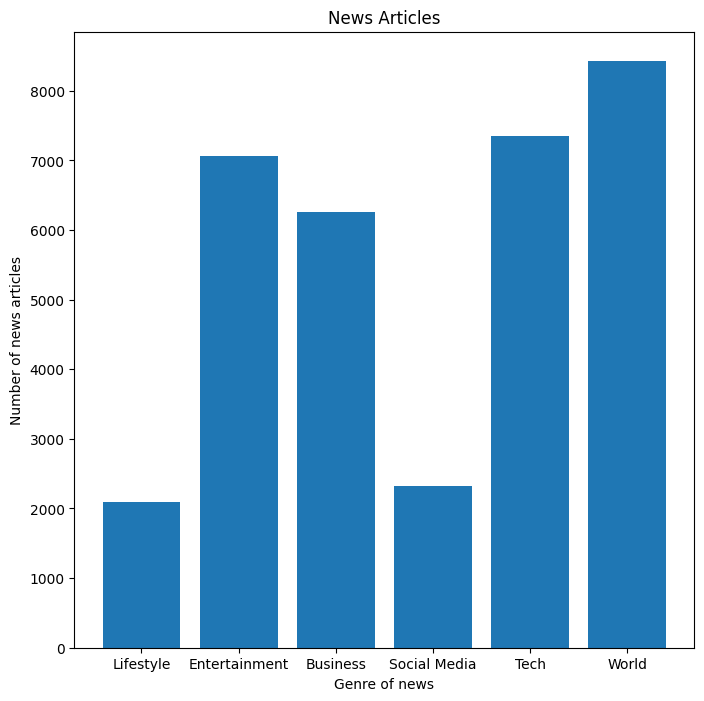

In [ ]:
labels = ['Lifestyle', 'Entertainment', 'Business', 'Social Media', 'Tech', 'World']
values = []
l = lifestyle.shape[0]
e = entertainment.shape[0]
b = business.shape[0]
s = social_media.shape[0]
t = tech.shape[0]
w = world.shape[0]
values.append(l)
values.append(e)
values.append(b)
values.append(s)
values.append(t)
values.append(w)
plt.figure(figsize=(8, 8))
plt.bar(labels, values)
plt.title("News Articles")
plt.xlabel("Genre of news")
plt.ylabel("Number of news articles")

<h3>From the above graph we come to know that the most news articles are about world news, then about tech and entertainment <b>indicating that there are a lot of things happening around the world</b>. It might be good or bad. We'll see that later.</h3>

<h3>Now let's see which genre of news has the longest title</h3>

Text(0, 0.5, 'Number of words in the title')

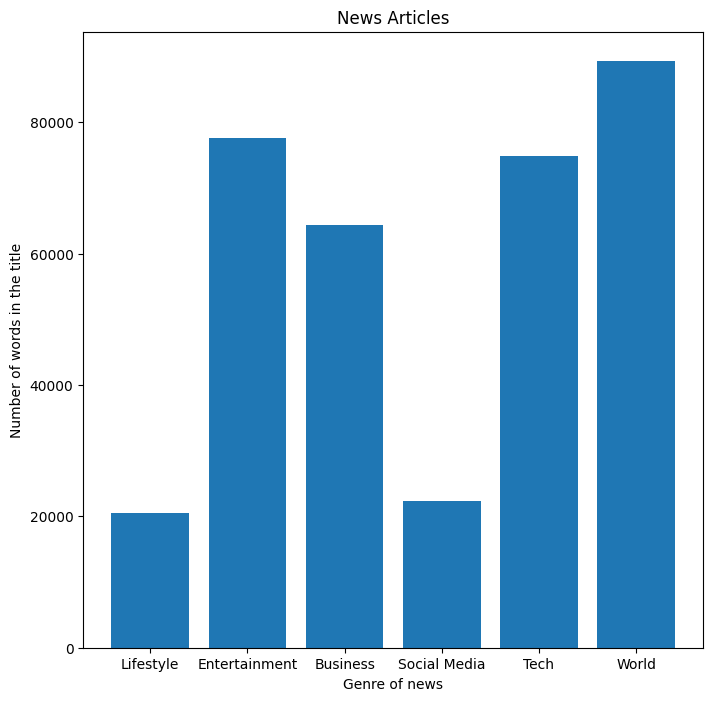

In [ ]:
labels = ['Lifestyle', 'Entertainment', 'Business', 'Social Media', 'Tech', 'World']
values = []
l = lifestyle[' n_tokens_title'].sum()
e = entertainment[' n_tokens_title'].sum()
b = business[' n_tokens_title'].sum()
s = social_media[' n_tokens_title'].sum()
t = tech[' n_tokens_title'].sum()
w = world[' n_tokens_title'].sum()
values.append(l)
values.append(e)
values.append(b)
values.append(s)
values.append(t)
values.append(w)
plt.figure(figsize=(8, 8))
plt.bar(labels, values)
plt.title("News Articles")
plt.xlabel("Genre of news")
plt.ylabel("Number of words in the title")

<h3>It seems that world news have usually longer titles catching the attention of many audience.</h3>

Text(0, 0.5, 'Number of words in the content in millions')

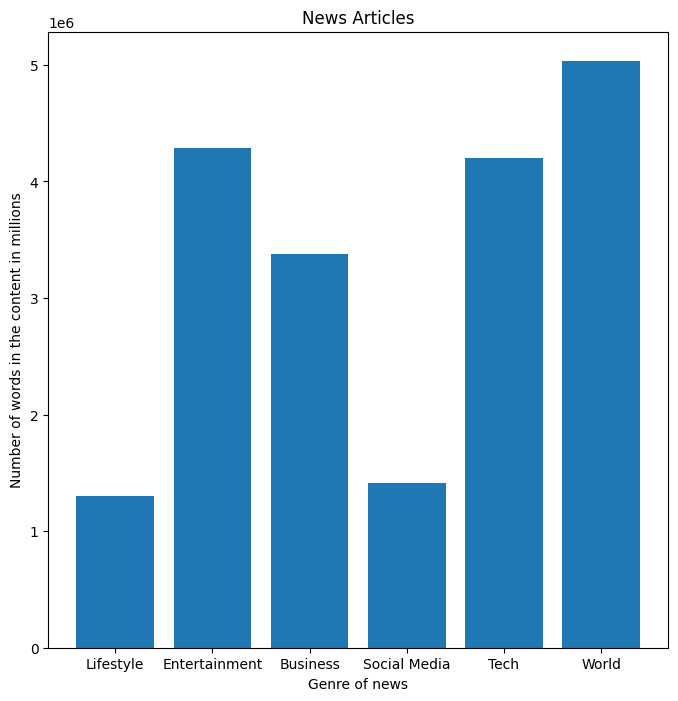

In [ ]:
labels = ['Lifestyle', 'Entertainment', 'Business', 'Social Media', 'Tech', 'World']
values = []
l = lifestyle[' n_tokens_content'].sum()
e = entertainment[' n_tokens_content'].sum()
b = business[' n_tokens_content'].sum()
s = social_media[' n_tokens_content'].sum()
t = tech[' n_tokens_content'].sum()
w = world[' n_tokens_content'].sum()
values.append(l)
values.append(e)
values.append(b)
values.append(s)
values.append(t)
values.append(w)
plt.figure(figsize=(8, 8))
plt.bar(labels, values)
plt.title("News Articles")
plt.xlabel("Genre of news")
plt.ylabel("Number of words in the content in millions")

<h3>As expected, longer the headlines longer the content of the news.</h3>

Text(0, 0.5, 'Rate of negative words in the content')

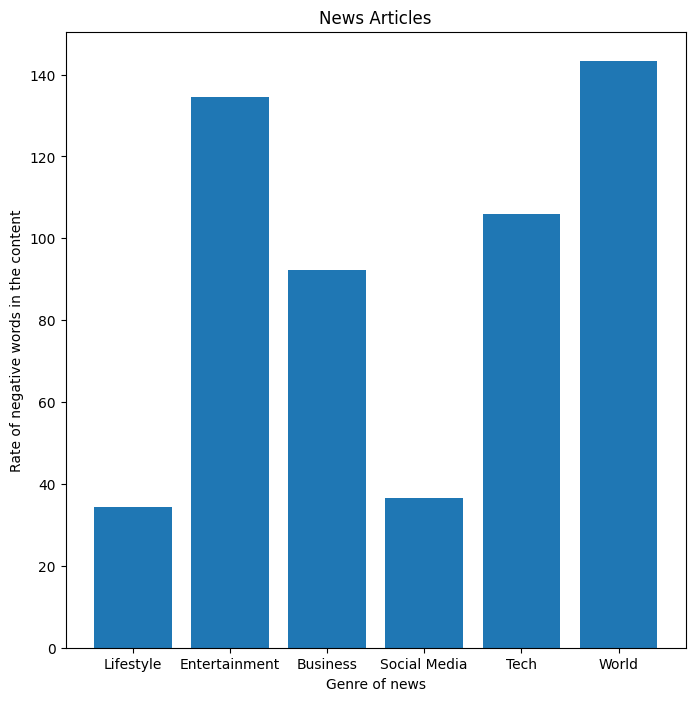

In [ ]:
labels = ['Lifestyle', 'Entertainment', 'Business', 'Social Media', 'Tech', 'World']
values = []
l = lifestyle[' global_rate_negative_words'].sum()
e = entertainment[' global_rate_negative_words'].sum()
b = business[' global_rate_negative_words'].sum()
s = social_media[' global_rate_negative_words'].sum()
t = tech[' global_rate_negative_words'].sum()
w = world[' global_rate_negative_words'].sum()
values.append(l)
values.append(e)
values.append(b)
values.append(s)
values.append(t)
values.append(w)
plt.figure(figsize=(8, 8))
plt.bar(labels, values)
plt.title("News Articles")
plt.xlabel("Genre of news")
plt.ylabel("Rate of negative words in the content")

<h3>A lot of world news content has high rate of negative words which is bad. It indicates that there are a lot of <b>bad things happening in the world.</b></h3>

<h3>This dataset had data such that bar graphs would explain it the best. So, pie charts and scatter plots were not used in the visualization because of the data in the dataset.</h3>

In [ ]:
df.max()

 n_tokens_title                       23.000000
 n_tokens_content                   8474.000000
 n_unique_tokens                     701.000000
 n_non_stop_words                   1042.000000
 n_non_stop_unique_tokens            650.000000
 num_hrefs                           304.000000
 num_self_hrefs                      116.000000
 num_imgs                            128.000000
 num_videos                           91.000000
 average_token_length                  8.041534
 num_keywords                         10.000000
 data_channel_is_lifestyle             1.000000
 data_channel_is_entertainment         1.000000
 data_channel_is_bus                   1.000000
 data_channel_is_socmed                1.000000
 data_channel_is_tech                  1.000000
 data_channel_is_world                 1.000000
 kw_min_min                          377.000000
 kw_max_min                       298400.000000
 kw_avg_min                        42827.857143
 kw_min_max                       843300

 <h3>As you can see above that the maximum values for different columns are quite different. Some max values are very big and some max values are very small. This is an indication of highly imbalanced dataset. This is not good for our predictions. So, to tackle this problem one simple solution is to normalize the data. We will use Z-score normalization. We will implement Z-score funtion ourselves below.</h3>

In [ ]:
def z_score_normalization(column):
  mean = np.mean(column)
  std = np.std(column) #standard deviation
  column -= mean
  column /= std
  return column

<h3>Before normalizing, let's divide our dataset into training and testing datasets. </h3>

In [ ]:
def split_dataset(df, seed):
  df = df.sample(frac=1, random_state = seed).reset_index(drop=True)
  boundary = int(np.floor(df.shape[0]*0.8))
  X_train = df.iloc[:boundary,:-1]
  Y_train = df.iloc[:boundary, -1]
  X_test = df.iloc[boundary:, :-1]
  Y_test = df.iloc[boundary:, -1]
  return X_train, Y_train, X_test, Y_test

In [ ]:
X_train, Y_train, X_test, Y_test = split_dataset(df, 97)
X_train.shape, Y_train.shape

((31715, 58), (31715,))

In [ ]:
X_test.shape, Y_test.shape

((7929, 58), (7929,))

<h3>Now we'll normalize only X_train and X_test and not Y_train and Y_test because they denote the target. We want to predict that.</h3>

In [ ]:
for col in X_train.columns:
  X_train[col] = z_score_normalization(X_train[col])

In [ ]:
for col in X_test.columns:
  X_test[col] = z_score_normalization(X_test[col])

In [ ]:
X_train.max()

 n_tokens_title                    5.959543
 n_tokens_content                 16.759210
 n_unique_tokens                   3.426705
 n_non_stop_words                  0.175152
 n_non_stop_unique_tokens          2.125187
 num_hrefs                        25.919020
 num_self_hrefs                   18.408887
 num_imgs                         14.901415
 num_videos                       21.493758
 average_token_length              4.142396
 num_keywords                      1.452063
 data_channel_is_lifestyle         4.226907
 data_channel_is_entertainment     2.152955
 data_channel_is_bus               2.313966
 data_channel_is_socmed            3.974695
 data_channel_is_tech              2.082003
 data_channel_is_world             1.928053
 kw_min_min                        5.049920
 kw_max_min                       72.819261
 kw_avg_min                       65.120596
 kw_min_max                       14.636137
 kw_max_max                        0.423488
 kw_avg_max                     

<h3>We have successfully scaled our feature matrix. By doing this we have eliminated any bias towards any specific feature. No feature will have unnecessary advantage over any other feature.</h3>

In [ ]:
X_train.min()

 n_tokens_title                  -3.971637
 n_tokens_content                -1.153493
 n_unique_tokens                 -3.874095
 n_non_stop_words                -5.709326
 n_non_stop_unique_tokens        -4.372390
 num_hrefs                       -0.958922
 num_self_hrefs                  -0.857515
 num_imgs                        -0.545315
 num_videos                      -0.302352
 average_token_length            -5.391971
 num_keywords                    -3.263391
 data_channel_is_lifestyle       -0.236580
 data_channel_is_entertainment   -0.464478
 data_channel_is_bus             -0.432158
 data_channel_is_socmed          -0.251592
 data_channel_is_tech            -0.480307
 data_channel_is_world           -0.518658
 kw_min_min                      -0.388574
 kw_max_min                      -0.283726
 kw_avg_min                      -0.480284
 kw_min_max                      -0.236312
 kw_max_max                      -3.521092
 kw_avg_max                      -1.922825
 kw_min_avg

In [ ]:
X_train.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
count,3.171500e+04,3.171500e+04,3.171500e+04,3.171500e+04,3.171500e+04,3.171500e+04,3.171500e+04,3.171500e+04,3.171500e+04,3.171500e+04,...,3.171500e+04,3.171500e+04,3.171500e+04,3.171500e+04,3.171500e+04,3.171500e+04,3.171500e+04,3.171500e+04,3.171500e+04,3.171500e+04
mean,-4.167143e-16,-2.957327e-17,-3.808679e-17,-4.682435e-16,-3.781795e-16,-6.373937e-17,-1.165008e-17,3.562235e-17,3.584639e-18,1.028343e-15,...,-1.998436e-16,5.914655e-17,2.804980e-16,1.926744e-17,9.118426e-17,1.321836e-16,-2.621268e-17,4.122335e-17,-1.657896e-17,-1.052988e-16
std,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,...,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00
min,-3.971637e+00,-1.153493e+00,-3.874095e+00,-5.709326e+00,-4.372390e+00,-9.589221e-01,-8.575150e-01,-5.453150e-01,-3.023519e-01,-5.391971e+00,...,-3.389211e+00,-1.336282e+00,-3.053116e+00,-5.799502e+00,-1.649151e+00,-9.381159e+00,-8.693209e-01,-4.050178e+00,-1.811747e+00,-6.898146e-01
25%,-6.612436e-01,-6.334878e-01,-4.340571e-01,1.751520e-01,-3.058017e-01,-6.052650e-01,-5.971582e-01,-4.246374e-01,-3.023519e-01,-8.208067e-02,...,-4.564728e-01,-6.360141e-01,-6.320499e-01,-5.388358e-01,-6.153989e-01,-1.830298e-01,-8.693209e-01,-2.734405e-01,-9.287256e-01,-6.898146e-01
50%,-1.883303e-01,-2.889314e-01,6.298561e-02,1.751520e-01,1.165686e-01,-3.400221e-01,-7.644466e-02,-4.246374e-01,-3.023519e-01,1.371619e-01,...,5.128136e-02,6.425338e-02,1.749723e-01,4.517920e-02,7.376909e-02,7.977386e-02,-4.573865e-01,-2.734405e-01,8.373164e-01,-6.898146e-01
75%,7.574963e-01,3.536768e-01,5.677331e-01,1.751521e-01,5.302209e-01,1.904636e-01,1.839121e-01,-6.260471e-02,-6.283422e-02,3.628533e-01,...,5.546965e-01,6.425338e-02,9.819944e-01,5.710851e-01,7.629371e-01,6.053813e-01,6.754333e-01,2.930701e-01,8.373164e-01,4.166036e-01
max,5.959543e+00,1.675921e+01,3.426705e+00,1.751521e-01,2.125187e+00,2.591902e+01,1.840889e+01,1.490142e+01,2.149376e+01,4.142396e+00,...,6.194474e+00,1.266907e+01,9.819944e-01,2.030462e+00,1.796689e+00,1.130989e+00,2.220188e+00,3.503297e+00,8.373164e-01,3.735858e+00


In [ ]:
# We are doing this because we want the shape of the input features to be (n_x, m) where n_x denotes the number of features and m denotes the number of training examples.
X_train = X_train.T
X_train.shape

(58, 31715)

In [ ]:
X_test = X_test.T
X_test.shape

(58, 7929)

In [ ]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,31705,31706,31707,31708,31709,31710,31711,31712,31713,31714
n_tokens_title,1.703323,3.594976,-0.661244,0.284583,-0.188330,1.230410,-0.661244,0.284583,1.703323,-0.188330,...,0.284583,-0.661244,-0.188330,-0.661244,-0.188330,-0.188330,0.284583,-1.607070,1.230410,0.284583
n_tokens_content,0.036600,-0.673651,-0.595439,-0.870238,-0.500316,-0.817392,3.275007,-0.115596,0.053511,0.858885,...,0.087333,-0.724383,-0.792026,-0.753977,-0.191695,-0.445356,0.732055,0.417092,0.142293,0.023917
n_unique_tokens,0.395930,0.849952,-0.194952,1.380269,0.144912,0.701073,-1.469126,0.265061,0.324534,-0.525317,...,-0.217302,0.740918,1.249273,1.093905,-0.386659,-0.082038,-0.797390,-0.253535,-0.280437,-0.210324
n_non_stop_words,0.175152,0.175152,0.175152,0.175152,0.175152,0.175152,0.175152,0.175152,0.175152,0.175152,...,0.175152,0.175152,0.175152,0.175152,0.175152,0.175152,0.175152,0.175152,0.175152,0.175152
n_non_stop_unique_tokens,0.571831,0.930780,-1.234536,0.869974,-0.074513,0.370841,-1.310732,0.404575,0.079654,0.039249,...,0.205903,0.609086,1.509627,0.129503,-0.625612,-0.096782,-0.915273,0.238794,-0.148965,-0.053641


In [ ]:
Y_train = Y_train.values.reshape(1, -1)
Y_train.shape

(1, 31715)

In [ ]:
Y_test = Y_test.values.reshape(1, -1)
Y_test.shape

(1, 7929)

<h2><b><u>IMPLEMENTING NEURAL NETWORK FROM SCRATCH</u></b></h2>
<h3>Now that we have prepared our data, we can start with making our NN.<br>
First we'll make our own activation function. Since we are doing regression, ReLu will be the best choice.</h3>

In [ ]:
def relu_af(Z):
  A = np.maximum(0, Z)
  return A

In [ ]:
# Verifying if the above code is correct or not

Z = np.array([1,4,7,-100,47,-15.258,-45.2,14,2658])
A = relu_af(Z)
A

array([1.000e+00, 4.000e+00, 7.000e+00, 0.000e+00, 4.700e+01, 0.000e+00,
       0.000e+00, 1.400e+01, 2.658e+03])

<h3>Let's now initialize our model parameters <b>W</b> and <b>b</b>.</h3>

In [ ]:
# num_nodes_in_layers is a list which contains the number of nodes in each layer.

def initialize_parameters(num_nodes_in_layers):
  L = len(num_nodes_in_layers)

  # parameters is a dictionary from where we'll extract all our parameters W and b
  parameters = {}

  # Convention: W1 is the weight matrix of first hidden layer. b2 is the bias matrix of second hidden layer. Similarly for other layers.
  for l in range(1,L):
    parameters['W' + str(l)] = np.random.rand(num_nodes_in_layers[l], num_nodes_in_layers[l-1])*0.01
    parameters['b' + str(l)] = np.zeros((num_nodes_in_layers[l], 1))

  return parameters

In [ ]:
# Verifying if the above code is correct or not

par = initialize_parameters([5, 2,3,1,2])
W1 = par['W1']
b1 = par['b1']
W2 = par['W2']
b2 = par['b2']
W3 = par['W3']
b3 = par['b3']
W4 = par['W4']
b4 = par['b4']
W3, b2

(array([[0.00111725, 0.00996564, 0.00795672]]),
 array([[0.],
        [0.],
        [0.]]))

<h3><u>Cost function</u>: We'll use <b>Mean Squared Error (MSE)</b> as cost function for our regression analysis since its the most popular choice and it is <b>convex function</b>, that is, only has one minima <b>(global minima)</b> which we want since we are using Gradient Descent to calculate the values of our model parameters W and b.</h3>

In [ ]:
def mse(Y, y_pred):
  cost = np.mean((Y-y_pred)**2)
  return cost

In [ ]:
# Verifying if the above code is correct or not

Y_temp = np.array([1, 2,3,4,5,6]).reshape((6,1))
y_pred_temp = np.array([2,1,4,5,5,7]).reshape((6,1))
cost = mse(Y_temp,y_pred_temp)
print(cost)

0.8333333333333334


<h3><u>Forward Propagation</u></h3>

In [ ]:
def forward_prop(W, b, A_prev_layer):
  Z = np.dot(W,A_prev_layer) + b
  A = relu_af(Z)
  return A, Z

In [ ]:
# Verifying if the above code is correct or not

W = np.array([[1,2,1,2,1],[0,1,0,1,0]])
A_prev = np.array([[1,0,1],[1,0,1],[0,1,0],[0,1,0],[1,0,1]])
b = np.array([[2],[3]])
A, Z = forward_prop(W,b,A_prev)
A

array([[6, 5, 6],
       [4, 4, 4]])

<h3><u>Backward Propagation</u></h3>

In [ ]:
def backward_prop(dA, Z, A_prev, W):
  dZ = np.multiply(dA, relu_af(Z))
  m = dZ.shape[1]
  dW = (1/m)*(np.dot(dZ, A_prev.T))
  db = (1/m)*(np.sum(dZ, axis = 1, keepdims = True))
  dA_prev = np.dot(W.T, dZ)
  return dA_prev, dW, db

In [ ]:
# Verifying if the above code is correct or not

dA = np.array([[1,1,1],[0,0,0]])
Z = np.array([[1,1,1],[0,0,0]])
A_prev = np.array([[1,1,1],[0,0,0], [1,1,1]])
W = np.array([[1,1,1],[0,0,0]])
dA_prev, dW, db = backward_prop(dA, Z, A_prev, W)
dW

array([[1., 0., 1.],
       [0., 0., 0.]])

<h3><u>Updating the parameters <b>W</b> and <b>b</b></u></h3>

In [ ]:
def update_parameters(parameters, grads, L, learning_rate):
  for l in range(1, L):
    parameters["W" + str(l)] -= learning_rate*grads["dW" + str(l)]
    parameters["b" + str(l)] -= learning_rate*grads["db" + str(l)]
    return parameters

<h3>Now we are ready to create our model.</h3>

In [ ]:
def model(X, Y, learning_rate, epochs, num_nodes_in_layers, optimization = "normal"):

  parameters = initialize_parameters(num_nodes_in_layers)
  check_par = []

  L = len(num_nodes_in_layers)

  J = []
  caches = []
  grads = {}

  for epoch in range(epochs):
    A_prev = X
    for l in range(1,L):
      W_l = parameters["W" + str(l)]
      b_l = parameters["b" + str(l)]
      A, Z = forward_prop(W_l, b_l, A_prev)
      caches.append((A_prev, W_l, Z))
      A_prev = A
    cost = mse(Y, A)
    if epoch%1 == 0:
      J.append(cost)
    dA = -2 * (Y - A)
    for l in reversed(range(1,L)):
      A_prev, W_l, Z = caches[l-1]
      dA_prev, dW, db = backward_prop(dA, Z, A_prev, W_l)
      """
      print("Layer", l)
      print("Z = ", Z)
      print("A_prev = ", A_prev)
      print("dA = ", dA)
      print("A = ", relu_af(Z))
      print("dW = ", dW)
      print("db = ", db)
      print()
      """
      dA = dA_prev
      #print("Befor W = ", parameters["W" + str(l)])
      parameters["W" + str(l)] -= learning_rate*dW
      #print("After W = ", parameters["W" + str(l)])
      parameters["b" + str(l)] -= learning_rate*db


    if optimization == "normal":
      pass
    #check_par.append(parameters)
  return parameters, J

In [ ]:
def model2(X, Y, learning_rate, epochs, num_nodes_in_layers, batch_size, optimization = "normal"):

  parameters = initialize_parameters(num_nodes_in_layers)
  check_par = []

  L = len(num_nodes_in_layers)
  m = X.shape[1]
  J = []
  caches = []
  grads = {}

  for epoch in range(epochs):
    permutation = np.random.permutation(m)
    X_shuffled = X[:, permutation]
    Y_shuffled = Y[:, permutation]
    for i in range(0, m, batch_size):
      X_mini_batch = X_shuffled[:, i:i+batch_size]
      Y_mini_batch = Y_shuffled[:, i:i+batch_size]
      A_prev = X_mini_batch
      for l in range(1,L):
        W_l = parameters["W" + str(l)]
        b_l = parameters["b" + str(l)]
        A, Z = forward_prop(W_l, b_l, A_prev)
        caches.append((A_prev, W_l, Z))
        A_prev = A
      cost = mse(Y_mini_batch, A)
      if epoch%1 == 0:
        J.append(cost)
      dA = -2 * (Y_mini_batch - A)
      for l in reversed(range(1,L)):
        A_prev, W_l, Z = caches[l-1]
        dA_prev, dW, db = backward_prop(dA, Z, A_prev, W_l)
        dA = dA_prev
        #print("Befor W = ", parameters["W" + str(l)])
        parameters["W" + str(l)] -= learning_rate*dW
        #print("After W = ", parameters["W" + str(l)])
        parameters["b" + str(l)] -= learning_rate*db


    if optimization == "normal":
      pass
    #check_par.append(parameters)
  return parameters, J

In [ ]:
# Verifying if the above code is correct or not

# m = 3
num_nodes_temp = [2, 2, 3, 1] # L = 4
X = np.array([[10,49,27],[1,0,159]])
Y = np.array([289,34,97]).reshape((1,3))
params_temp, J_fn_temp = model(X, Y, 0.01, 1, num_nodes_temp, "normal")
params_temp

{'W1': array([[0.00166319, 0.00573891],
        [0.0091362 , 0.00032754]]),
 'b1': array([[3.75663449e-12],
        [5.58952858e-13]]),
 'W2': array([[0.0067651 , 0.00031171],
        [0.00742601, 0.00618251],
        [0.00614157, 0.00836015]]),
 'b2': array([[3.70581014e-10],
        [8.30582993e-11],
        [1.46903320e-10]]),
 'W3': array([[0.00286509, 0.00045707, 0.00085189]]),
 'b3': array([[2.41712298e-05]])}

In [ ]:
num_nodes = []
num_nodes.append(X_train.shape[0])
list1 = [100, 50, 25, 10, 1]
num_nodes += list1
params, cost_J = model(X_train, Y_train, 0.1, 100, num_nodes, "normal")

In [ ]:
cost_J

[150423708.1079554,
 150423628.0188676,
 150423547.93024823,
 150423467.84209716,
 150423387.75441447,
 150423307.66720012,
 150423227.58045408,
 150423147.49417645,
 150423067.40836713,
 150422987.32302612,
 150422907.23815346,
 150422827.1537491,
 150422747.06981313,
 150422666.98634544,
 150422586.90334606,
 150422506.82081497,
 150422426.73875222,
 150422346.6571578,
 150422266.57603166,
 150422186.4953738,
 150422106.41518426,
 150422026.33546296,
 150421946.25621,
 150421866.1774253,
 150421786.09910887,
 150421706.0212607,
 150421625.94388083,
 150421545.8669693,
 150421465.79052588,
 150421385.7145508,
 150421305.639044,
 150421225.56400543,
 150421145.4894351,
 150421065.41533303,
 150420985.3416992,
 150420905.2685336,
 150420825.19583625,
 150420745.1236071,
 150420665.05184618,
 150420584.98055348,
 150420504.90972903,
 150420424.83937278,
 150420344.76948476,
 150420264.70006496,
 150420184.63111335,
 150420104.56262988,
 150420024.49461466,
 150419944.42706764,
 150419864

<h3>Due to limited computing resources I could only run 100 iterations. But as you can see the cost function decreases as the number of iterations increases. This is a sign that our model is correctly implemented.  </h3>

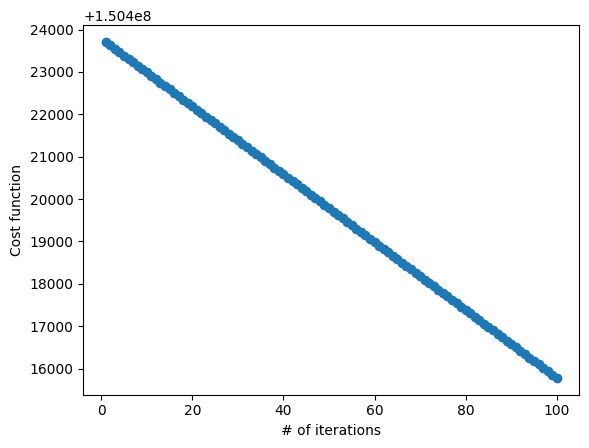

In [ ]:
labels = np.arange(1, 101)
plt.scatter(labels, cost_J)
plt.ylabel("Cost function")
plt.xlabel("# of iterations")
plt.show()

<h3>CLassification task</h3>

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

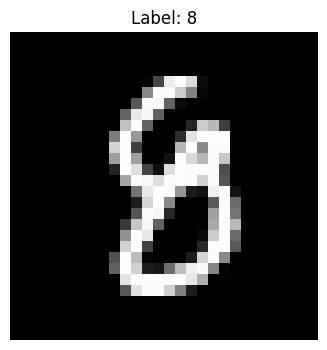

In [ ]:
plt.figure(figsize=(12, 4))
plt.imshow(x_train[594], cmap='gray')
plt.title(f"Label: {y_train[594]}")
plt.axis('off')
plt.show()

In [ ]:
x_train = np.array(x_train).reshape((28*28, x_train.shape[0],))
x_test = np.array(x_test).reshape((28*28, x_test.shape[0],))

In [ ]:
y_train = np.array(y_train).reshape((1, y_train.shape[0]))
y_test = np.array(y_test).reshape((1, y_test.shape[0]))